# Predicting the S&P 500

# Why the S&P 500?

The S&P 500 index is a popular choice for investment due to its historical performance as a long-term investment. Exchange-traded funds (ETFs) that track the S&P 500 index are considered to be excellent options for those looking to invest for the long-term. Despite experiencing numerous market downturns throughout its history, the S&P 500 index has consistently demonstrated positive average returns over time. In other words, while there may be periods of both strong and weak performance, the overall trend of the index has been upward over the long-term. This makes the S&P 500 an attractive option for those looking to invest for the long-term and potentially achieve positive returns over time, despite the market's ups and downs.

# Problem Statement

S&P 500 is the stock market index that measures the stock performance of 500 large companies in USA. I want to predict the stock prices for it based on the available variables and historical data. I know the historical prices are no clear indicators of whether a price will go up or down in future. With that risk, I’ll use predictive analytics and various machine learning algorithms like Random Forest Classifier, KNeighbors, Ensemble, and LSTM to predict the stock price.

# Method

Before we get to the machine learning, we need to do a lot of work to acquire and clean up the data. Here are the steps we'll follow:

- Download historical stock prices from Yahoo finance
- Explore the data
- Setup the dataset to predict future prices using historical prices
- Test a machine learning models

# Data Sources

Yahoo Finace API

In [1]:
# Required packages
import datetime
import yfinance as yf

start = datetime.datetime(2005, 1, 1)
end = datetime.datetime(2023, 1, 10)

#Call Yahoo Finance API to fetch data for Standard & Poor 500 Index (tikcer: ^GSPC) for date range between 2005 till today.
df = yf.download("^GSPC", start, end)

dates =[]
for x in range(len(df)):
    newdate = str(df.index[x])
    newdate = newdate[0:10]
    dates.append(newdate)

# Add date values also as a first column
df.insert(0,'Date', dates)

[*********************100%***********************]  1 of 1 completed


### Glimpse of the data

In [2]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2005-01-03,2005-01-03,1211.920044,1217.800049,1200.319946,1202.079956,1202.079956,1510800000
2005-01-04,2005-01-04,1202.079956,1205.839966,1185.390015,1188.050049,1188.050049,1721000000
2005-01-05,2005-01-05,1188.050049,1192.729980,1183.719971,1183.739990,1183.739990,1738900000
2005-01-06,2005-01-06,1183.739990,1191.630005,1183.270020,1187.890015,1187.890015,1569100000
2005-01-07,2005-01-07,1187.890015,1192.199951,1182.160034,1186.189941,1186.189941,1477900000


### Data Describe

In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4536.000000,4536.000000,4536.000000,4536.000000,4536.000000,4.536000e+03
mean,2078.304688,2090.214594,2065.409731,2078.578783,2078.578783,3.851447e+09
std,997.143999,1002.591810,991.052789,997.098696,997.098696,1.239951e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,7.249400e+08
25%,1288.150024,1294.584991,1281.197479,1288.804993,1288.804993,3.136338e+09
50%,1808.144958,1812.535034,1802.260010,1808.984985,1808.984985,3.702015e+09
75%,2715.092529,2731.322510,2698.799988,2713.100037,2713.100037,4.407558e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,1.145623e+10


### Data Type Check

In [4]:
# Data type check
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

### Null Check

In [5]:
# Null value check
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### S&P 500 & The 5 Big Stocks

We want to see the correlation between the S&P 500 and the top 5 stocks (Apple, Microsoft, Google, Amazon, Berkshire Hathaway)

In [6]:
import pandas as pd

tickers = ['AAPL','MSFT','GOOGL','AMZN', 'BRK-B', '^GSPC']

start = datetime.datetime(2005, 1, 1)
end = datetime.datetime(2020, 4, 9)
top5_df = pd.DataFrame()

#Call Yahoo Finance API to fetch data for Top 5 Tickers and S&P 500 for date range between 2010 till today.
for ticker in tickers:
    df1 = yf.download(ticker, start, end)
    top5_df[ticker] = df1['Adj Close']
top5_df.rename(columns = {'^GSPC':'S&P500'}, inplace = True)

# Also adding Date as column
dates =[]
for x in range(len(top5_df)):
    newdate = str(top5_df.index[x])
    newdate = newdate[0:10]
    dates.append(newdate)

# Add date values also as a first column
top5_df.insert(0,'Date', dates)
    
top5_df.head()



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Date,AAPL,MSFT,GOOGL,AMZN,BRK-B,S&P500
Date,,,,,,,
2005-01-03,2005-01-03,0.963385,18.860828,5.072823,2.2260,57.980000,1202.079956
2005-01-04,2005-01-04,0.973278,18.931356,4.867367,2.1070,57.099998,1188.050049
2005-01-05,2005-01-05,0.981803,18.889030,4.842593,2.0885,57.200001,1183.739990
2005-01-06,2005-01-06,0.982564,18.867874,4.718468,2.0525,57.480000,1187.890015
2005-01-07,2005-01-07,1.054106,18.811449,4.851101,2.1160,58.380001,1186.189941


### Correlation Matrix

A visualization of the correlation

C:\Users\brand\AppData\Local\Temp\ipykernel_8152\2905299846.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


Text(0.5, 1.0, 'Top 5 Stocks Correlation with S&P 500')

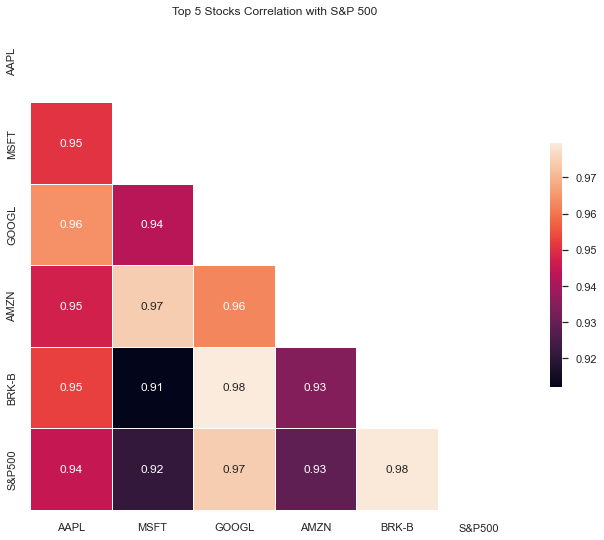

In [7]:
import numpy as np
import yellowbrick #Yellowbrick is the visualization library built from scikit-learn and matplotlib
import matplotlib.pyplot as plt # for plots
import seaborn as sns
import numpy as np
%matplotlib inline

sns.set_theme(style="white")

# calculate correlation matrix
corr = top5_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plot correlation matrix
fig, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, square=True, linewidths=.5, annot=True, 
            cbar_kws={"shrink": .5})

ax.set_title('Top 5 Stocks Correlation with S&P 500')

The top 5 stocks and the S&P 500 have a **Very Strong Possitive Correlation**

### Returns

Rate of return tells what % is gained or lost over a period of time. It is calculated with the below formula:

** Rate of Return % = (Curent Price - Starting Price)/ Starting Price * 100 **

I'm going to plot the yearly returns of the big 5 stocks along with S&P 500 since 2005

Text(0.5, 1.0, 'Big 5 stocks and S&P 500 Returns')

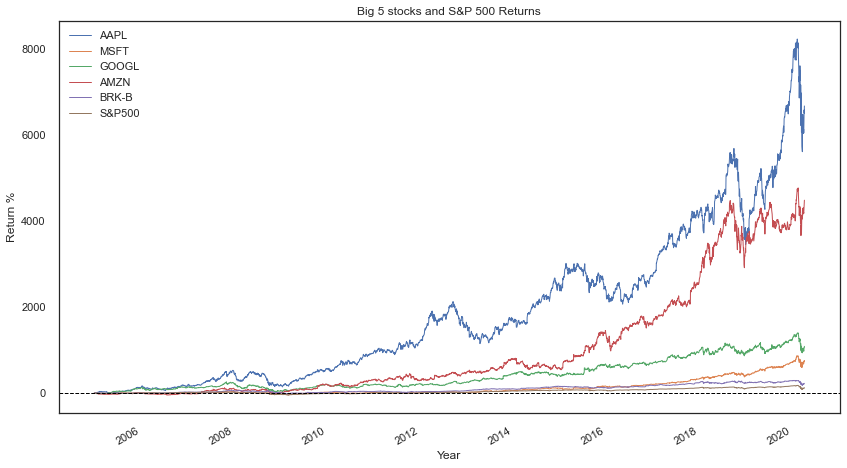

In [8]:
top5_df_dup = top5_df.copy() # make a copy of the close dataframe to make changes

# Removing date field 
top5_df_dup = top5_df_dup.drop(['Date'],axis=1)

# Calculating a Simple return
top5_df_dup = (top5_df_dup - top5_df_dup.iloc[0, :])/top5_df_dup.iloc[0, :]*100 

# plot the rate of return over time
top5_df_dup.plot(legend=True, figsize=(14, 8), linewidth=1)
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=1)
plt.xlabel('Year')
plt.ylabel('Return %')
plt.title('Big 5 stocks and S&P 500 Returns')

From the graph above, we can see that all the stocks were simular to each other in 2005. After 18 years, Apple and Microsoft had the greatest returns. 

### Daily Returns of S&P 500 

Visualization of the daily percentage change in stock value

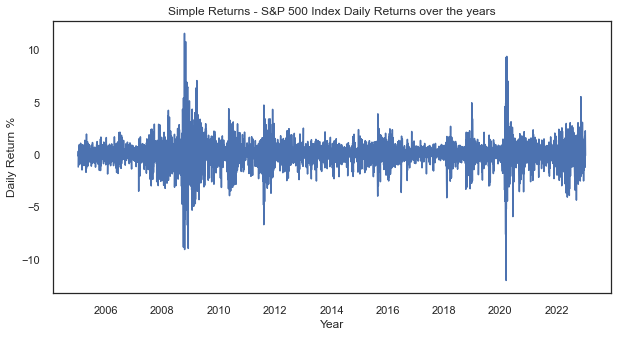

count    4535.000000
mean        0.033667
std         1.243832
min       -11.984055
25%        -0.413546
50%         0.069669
75%         0.570097
max        11.580037
Name: Return, dtype: float64

In [9]:
# Get `Adj Close` and assign to `daily_close`
daily_close = df['Adj Close']

# Daily returns percentage change
df['Return'] = 100 * (df['Adj Close'].pct_change())

# Rounding the change to 2 digits after decimal
daily_pct_chg = round(df['Return'],2)

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(df['Return'])
plt.xlabel('Year')
plt.ylabel('Daily Return %')
plt.title('Simple Returns - S&P 500 Index Daily Returns over the years')
plt.show()

# Describe
df['Return'].describe()

We see that most of the days of return are between -5 and 5. We can also see the biggest loss in the 2008 financial crisis and covid era. The largest lost in one day is -11.98 and the larget gain is 11.58. 

### Distribution of S&P 500 Returns

c:\Users\brand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    4535.000000
mean        0.033625
std         1.243820
min       -11.980000
25%        -0.410000
50%         0.070000
75%         0.570000
max        11.580000
Name: Return, dtype: float64

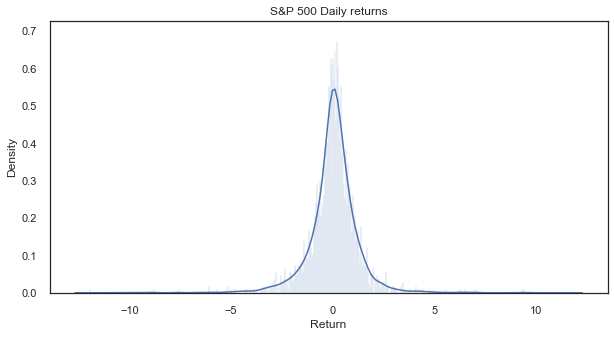

In [10]:
# histogram of Daily returns
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(df['Return'],bins=1000)
plt.title("S&P 500 Daily returns")
plt.ioff()
daily_pct_chg.describe()

The plot above looks normal distributed with a mean of 0.03 and a standard deviation of 1.24

### Volatility

Volatility is basically the dispersion of the financial asset returns over time. 
Volatility is an investment term that describes when a market or security experiences periods of unpredictable, and sometimes sharp, price movements. People often think about volatility only when prices fall, however volatility can also refer to sudden price rises too.

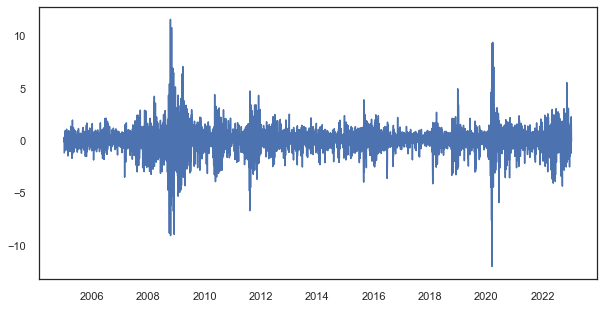

Daily volatility:  1.24%
Monthly volatility:  5.70%
Annual volatility:  19.75%


In [11]:
import math

# Plot the price returns
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(df['Return'])
plt.show()

# Calculate daily std of returns
std_daily = df['Return'].std()
print('Daily volatility: ', '{:.2f}%'.format(std_daily))

# Convert daily volatility to monthly volatility
# At an average there are 21 trading days in a month
std_monthly = math.sqrt(21) * std_daily
print('Monthly volatility: ', '{:.2f}%'.format(std_monthly))

# Convert daily volatility to annaul volatility
# At an average there are 252 trading days in an year
std_annual = math.sqrt(252) * std_daily
print('Annual volatility: ', '{:.2f}%'.format(std_annual))

The S&P 500 can fluctuate over 5 percent monthly and over 19 percent yearly.

### Defining new Features and Target for S&P 500
As part of EDA, we have seen how big 5 are influencing S&P 500. So, let's do the analysis on S&P 500 alone.
Let's define features and targets for S&P 500 and see how they are correlated

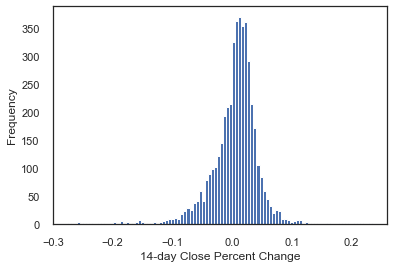

In [12]:
df['14d_close_pct'] = df['Adj Close'].pct_change(14)
df['14d_close_pct'].plot.hist(bins=100)
plt.xlabel('14-day Close Percent Change')
plt.show()

### Creating Features for 14 day Future Close and 14 day Future close percent change

In [13]:
df['14d_future_close'] = df['Adj Close'].shift(-14)
df['14d_future_close_pct'] = df['14d_future_close'].pct_change(14)

In [14]:
import talib
df['ma14'] = talib.SMA(df['Adj Close'].values, timeperiod=14)
df['ma200'] = talib.SMA(df['Adj Close'].values, timeperiod=200)
df['rsi14'] = talib.RSI(df['Adj Close'].values, timeperiod=14)
df['rsi200'] = talib.RSI(df['Adj Close'].values, timeperiod=200)
df['ema14'] = talib.EMA(df['Adj Close'].values, timeperiod=14)
df['ema200'] = talib.EMA(df['Adj Close'].values, timeperiod=200)

In [15]:
df1 = df.drop(['High','Low','Open','Close','Volume'],axis=1)

In [16]:
corr = df1.corr()

<AxesSubplot:>

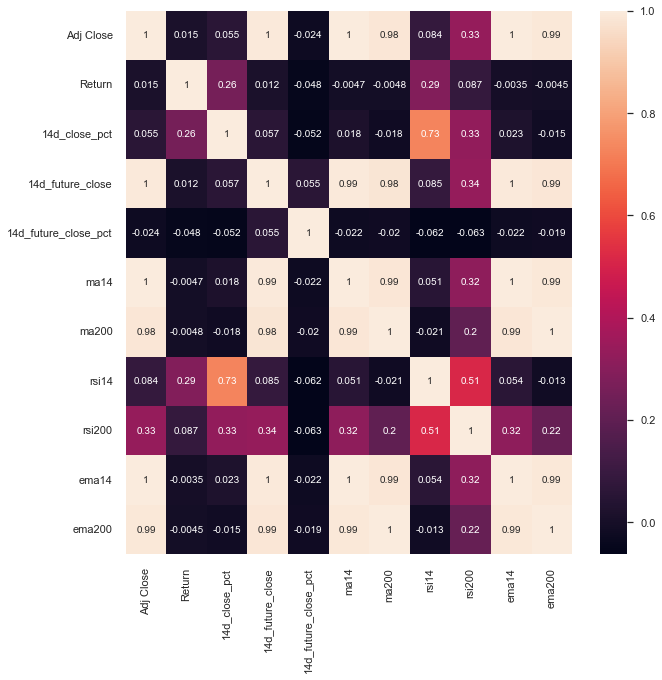

In [17]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True)

14-day future closing price, 14-day and 200-day moving average and 14-day and 200-day EMA are highly correlated with Adjusted Closing price of the stock.
Visualization below:

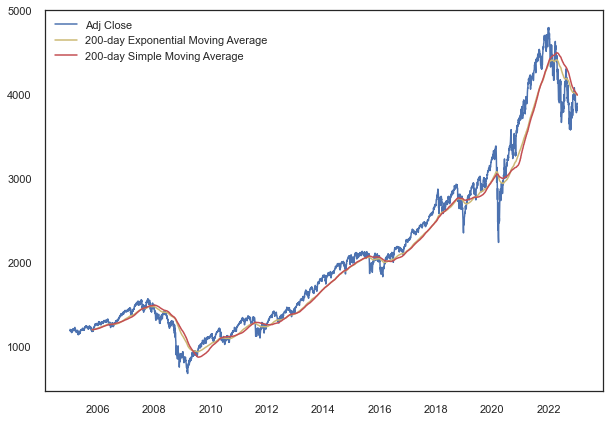

In [18]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(df1[['Adj Close']], label='Adj Close')
plt.plot(df1[['ema200']], label='200-day Exponential Moving Average', color='y')
plt.plot(df1[['ma200']], label='200-day Simple Moving Average', color='r')
plt.legend()
plt.show()

### Data Processing & Feature Engineering
Going back to the table where we initially pulled our data, if we want to know the S&P 500 is going up (1) or down (0) since the day of 2005–01–03 (where the closing price was 1202.07)

Since this is also the last step of data processing, we remove all of the NaN value that our indicators and prediction generated, as well as removing the ‘close’ column.

In [19]:
def _produce_prediction(data, window):
    """
    Function that produces the 'truth' values
    At a given row, it looks 'window' rows ahead to see if the price increased (1) or decreased (0)
    :param window: number of days, or rows to look ahead to see what the price did
    """
    
    prediction = (data.shift(-window)['Close'] >= df['Close'])
    prediction = prediction.iloc[:-window]
    data['pred'] = prediction.astype(int)
    
    return data

data = _produce_prediction(df, window=15)
del (data['Close'])
data = data.dropna() # Some indicators produce NaN values for the first few rows, we just remove them here
data.tail()
print(len(data))

4321


Removing Date Column as well

In [20]:
del (data['Date'])
data.head(10)

,Open,High,Low,Adj Close,Volume,Return,14d_close_pct,14d_future_close,14d_future_close_pct,ma14,ma200,rsi14,rsi200,ema14,ema200,pred
Date,,,,,,,,,,,,,,,,
2005-10-18,1190.099976,1190.099976,1178.130005,1178.140015,2197010000,-1.004954,-0.031843,1222.810059,0.037916,1197.354998,1199.033598,34.352570,49.039575,1193.778542,1198.944210,1.0
2005-10-19,1178.140015,1195.760010,1170.550049,1195.760010,2703590000,1.495577,-0.026000,1218.589966,0.019092,1195.074995,1199.072148,46.126475,49.753510,1194.042738,1198.912527,1.0
2005-10-20,1195.760010,1197.300049,1173.300049,1177.800049,2617250000,-1.501970,-0.041512,1220.650024,0.036381,1191.431423,1199.042448,38.539142,49.049568,1191.877046,1198.702452,1.0
2005-10-21,1177.800049,1186.459961,1174.920044,1179.589966,2470920000,0.151971,-0.038404,1230.959961,0.043549,1188.066424,1199.000948,39.605369,49.121670,1190.238768,1198.512278,1.0
2005-10-24,1179.589966,1199.390015,1179.589966,1199.380005,2197790000,1.677705,-0.012425,1234.719971,0.029465,1186.988569,1199.066898,49.944835,49.909351,1191.457600,1198.520912,1.0
2005-10-25,1199.380005,1201.300049,1189.290039,1196.540039,2312470000,-0.236786,0.000125,1233.760010,0.031106,1186.999285,1199.098348,48.657473,49.798159,1192.135259,1198.501202,1.0
2005-10-26,1196.540039,1204.010010,1191.380005,1191.380005,2467750000,-0.431246,-0.000092,1229.010010,0.031585,1186.991429,1199.140298,46.321250,49.596388,1192.034558,1198.430345,1.0
2005-10-27,1191.380005,1192.650024,1178.890015,1178.900024,2395370000,-1.047523,-0.014215,1231.209961,0.044372,1185.777143,1199.096299,41.172329,49.112687,1190.283287,1198.236013,1.0
2005-10-28,1178.900024,1198.410034,1178.900024,1198.410034,2379400000,1.654933,0.009332,1242.800049,0.037041,1186.568577,1199.201099,50.445843,49.880672,1191.366853,1198.237745,1.0


### Model Creation

In [21]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score

def cross_Validation(data):

    # Split data into equal partitions of size len_train
    
    num_train = 10 # Increment of how many starting points (len(data) / num_train  =  number of train-test sets)
    len_train = 40 # Length of each train-test set
    
    # Lists to store the results from each model
    rf_RESULTS = []
    knn_RESULTS = []
    gbt_RESULTS = []
    ensemble_RESULTS = []
   
    i = 0
    
    # Models which will be used
    rf = RandomForestClassifier()
    knn = KNeighborsClassifier()
    
    # Create a tuple list of our models
    estimators=[('knn', knn), ('rf', rf)]
    ensemble = VotingClassifier(estimators, voting='soft')
    
    while True:
        
        # Partition the data into chunks of size len_train every num_train days
        df2 = data.iloc[i * num_train : (i * num_train) + len_train]
        i += 1
        #print(i * num_train, (i * num_train) + len_train)
        
        if len(df2) < 40:
            break
        
        y = df2['pred']
        features = [x for x in df2.columns if x not in ['pred']]
        X = df2[features]

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 7 * len(X) // 10,shuffle=False)
        
        # fit models
        rf.fit(X_train, y_train)
        knn.fit(X_train, y_train)
        ensemble.fit(X_train, y_train)
        
        # get predictions
        rf_prediction = rf.predict(X_test)
        knn_prediction = knn.predict(X_test)
        ensemble_prediction = ensemble.predict(X_test)
        
        # print('rf prediction is ', rf_prediction)
        # print('knn prediction is ', knn_prediction)
        # print('ensemble prediction is ', ensemble_prediction)
        # print('truth values are ', y_test.values)
        
        # determine accuracy and append to results
        rf_accuracy = accuracy_score(y_test.values, rf_prediction)
        knn_accuracy = accuracy_score(y_test.values, knn_prediction)
        ensemble_accuracy = accuracy_score(y_test.values, ensemble_prediction)
        
        # print(rf_accuracy)
        # print(knn_accuracy)
        # print(ensemble_accuracy)
        rf_RESULTS.append(rf_accuracy)
        knn_RESULTS.append(knn_accuracy)
        ensemble_RESULTS.append(ensemble_accuracy)
                
    print('RF Accuracy = ' + str( sum(rf_RESULTS) / len(rf_RESULTS)))
    print('KNN Accuracy = ' + str( sum(knn_RESULTS) / len(knn_RESULTS)))
    print('ENSEMBLE Accuracy = ' + str( sum(ensemble_RESULTS) / len(ensemble_RESULTS)))
    
cross_Validation(data)

RF Accuracy = 0.7670940170940165
KNN Accuracy = 0.6025641025641024
ENSEMBLE Accuracy = 0.7179487179487175


Random Forest performed the best with an accuracy of 76.4%.

### Predicting the closing price of the S&P 500 

In [23]:
#Call Yahoo Finance API to fetch data for Standard & Poor 500 Index (tikcer: ^GSPC) for date range between 2005 till today.
df1 = yf.download("^GSPC", start, end)
df1.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,1211.920044,1217.800049,1200.319946,1202.079956,1202.079956,1510800000
2005-01-04,1202.079956,1205.839966,1185.390015,1188.050049,1188.050049,1721000000
2005-01-05,1188.050049,1192.729980,1183.719971,1183.739990,1183.739990,1738900000
2005-01-06,1183.739990,1191.630005,1183.270020,1187.890015,1187.890015,1569100000
2005-01-07,1187.890015,1192.199951,1182.160034,1186.189941,1186.189941,1477900000


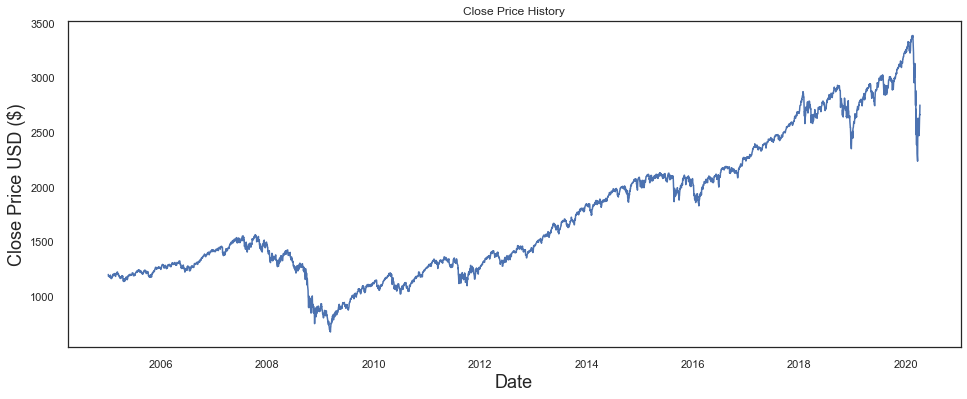

In [25]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df1['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [26]:
# Create a new dataframe with only the 'Close column 
data = df1.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3651

In [27]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.19395707],
       [0.18877925],
       [0.1871886 ],
       ...,
       [0.73336851],
       [0.73179264],
       [0.76521802]])

In [28]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.19395707, 0.18877925, 0.1871886 , 0.18872019, 0.18809277,
       0.18959116, 0.18691181, 0.18865005, 0.18486723, 0.18747648,
       0.19170584, 0.18751707, 0.18411439, 0.1813317 , 0.17981119,
       0.181531  , 0.18361982, 0.18379701, 0.1826197 , 0.18627705,
       0.18928116, 0.19067616, 0.1894583 , 0.1943077 , 0.19382421,
       0.19403829, 0.19023331, 0.19208598, 0.19514546, 0.19545546,
       0.19692429, 0.19700547, 0.19346624, 0.19377623, 0.18734362,
       0.18979416, 0.19326324, 0.19738561, 0.19451804, 0.19703133,
       0.19690951, 0.19705345, 0.20135295, 0.20253026, 0.20036022,
       0.19577653, 0.19660321, 0.19321896, 0.19571008, 0.19235907,
       0.1887866 , 0.18957638, 0.18936973, 0.18720338, 0.18274886,
       0.18305151, 0.18264186, 0.18369735, 0.18040536, 0.18632872])]
[0.18602607012792513]

[array([0.19395707, 0.18877925, 0.1871886 , 0.18872019, 0.18809277,
       0.18959116, 0.18691181, 0.18865005, 0.18486723, 0.18747648,
       0.19170584, 0.18751707, 0.18

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

3591/3591 [==============================] - 49s 13ms/step - loss: 7.2666e-04


In [30]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 [==============================] - 1s 13ms/step


143.08118503220268

C:\Users\brand\AppData\Local\Temp\ipykernel_8152\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


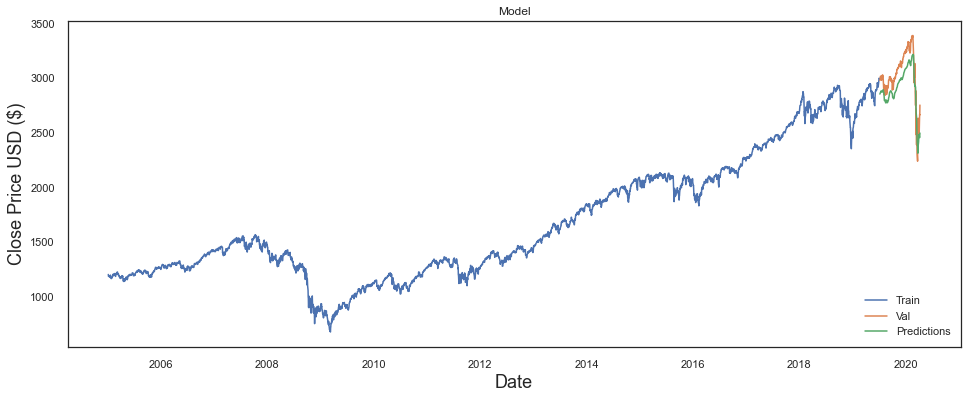

In [31]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [32]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-07-08,2975.949951,2850.674072
2019-07-09,2979.629883,2855.468506
2019-07-10,2993.070068,2857.935303
2019-07-11,2999.909912,2861.293945
2019-07-12,3013.770020,2865.462158
...,...,...
2020-04-02,2526.899902,2474.424561
2020-04-03,2488.649902,2466.990479
2020-04-06,2663.679932,2452.733887


### Conclusion 

The objective of this project is to utilize machine learning techniques to forecast the future value of the S&P 500 index. Despite the efforts made to date, there remains potential for further refinement of our prediction algorithm. The S&P 500 index is influenced by a variety of factors, such as company earnings per share, revenue, significant news related to the companies included on the index, economic indicators, major political developments, and interest rates. These factors can make it challenging to accurately predict the future movement of the index. However, by utilizing machine learning models, we aim to improve our ability to forecast the S&P 500 index price. The S&P 500 is still a good long term investment. 